In [64]:
%matplotlib inline

import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as colors
import matplotlib.cm as cmx
from mpl_toolkits.axes_grid1 import make_axes_locatable

import cosmo_metric_utils as cmu

In [65]:
file_extension =  'wfd' #'ddf'

# list of numbered files 
files = glob.glob('/media2/RESSPECT2/data/posteriors_wfd/omprior_0.01_flat/summary_cases_omprior_0.01_flat_redone*.csv')

dist_loc_base = '/media/RESSPECT/data/PLAsTiCC/for_metrics/' + file_extension + \
                '/distances/omprior_0.01_flat/emille_samples/*' #mu_photoIa_plasticc*'

if 'wfd' in file_extension:
    table_loc = '/media2/RESSPECT2/data/posteriors_wfd/omprior_0.01_flat/summary_cases_omprior_0.01_flat_redone.csv'
else:
    table_loc = '/media2/RESSPECT2/data/posteriors_ddf/omprior_0.01_flat/summary_cases_emille.csv' 

# list of stan input files
dist_loc_files = glob.glob(dist_loc_base)

# read summary table for the non-numbered case
df = pd.read_csv(table_loc)

In [66]:
from collections import OrderedDict

if 'wfd' in file_extension:
    remap_dict = OrderedDict({
                              'perfect3000': 'Perfect', 
                              'fiducial3000': 'Fiducial', 
                              #'random3000fail2998': 'Random',
                              'random3000': 'Random',
                              #'all_objs_survived_SALT2_DDF' : 'All SALT',
                              #'all_objs_survived_SALT2_WFD': 'All SALT',
                              #'50SNIa50SNII': 'SN-II 50',
                              #'68SNIa32SNII': 'SN-II 32',
                              '72SNIa28SNII': 'SN-II 28',
                              '75SNIa25SNII': 'SN-II 25', 
                              '90SNIa10SNII': 'SN-II 10',
                              '95SNIa5SNII': 'SN-II 5',
                              '98SNIa2SNII': 'SN-II 2',
                              '99SNIa1SNII': 'SN-II 1',
                              #'50SNIa50SNIbc': 'SN-Ibc 50',
                              #'68SNIa32SNIbc': 'SN-Ibc 32',
                              #'75SNIa25SNIbc': 'SN-Ibc 25',
                              #'83SNIa17SNIbc': 'SN-Ibc 17',
                              '90SNIa10SNIbc': 'SN-Ibc 10',
                              '95SNIa5SNIbc': 'SN-Ibc 5',
                              '98SNIa2SNIbc': 'SN-Ibc 2',
                              '99SNIa1SNIbc': 'SN-Ibc 1',
                              #'50SNIa50SNIax': 'SN-Iax 50',
                              #'68SNIa32SNIax': 'SN-Iax 32',
                              '75SNIa25SNIax': 'SN-Iax 25',
                              #'86SNIa14SNIax': 'SN-Iax 14',
                              '90SNIa10SNIax': 'SN-Iax 10',
                              #'94SNIa6SNIax': 'SN-Iax 6',
                              '95SNIa5SNIax': 'SN-Iax 5',
                              #'97SNIa3SNIax': 'SN-Iax 3',
                              '98SNIa2SNIax': 'SN-Iax 2',
                              '99SNIa1SNIax': 'SN-Iax 1',
                              #'71SNIa29SNIa-91bg': 'SN-Ia-91bg 29',
                              #'75SNIa25SNIa-91bg': 'SN-Ia-91bg 25',
                              #'90SNIa10SNIa-91bg': 'SN-Ia-91bg 10',
                              '95SNIa5SNIa-91bg': 'SN-Ia-91bg 5',
                              '98SNIa2SNIa-91bg': 'SN-Ia-91bg 2',
                              '99SNIa1SNIa-91bg': 'SN-Ia-91bg 1',
                              #'99.8SNIa0.2SNIa-91bg': 'SN-Ia-91bg 0.2',
                              #'57SNIa43AGN': 'AGN 43',
                              #'75SNIa25AGN': 'AGN 25',
                              #'90SNIa10AGN': 'AGN 10',
                              #'94SNIa6AGN': 'AGN 6',
                              '95SNIa5AGN': 'AGN 5',
                              '98SNIa2AGN': 'AGN 2',
                              '99SNIa1AGN': 'AGN 1',
                              #'99.9SNIa0.1AGN': 'AGN 0.1',
                              #'83SNIa17SLSN-I': 'SNLS-I 17',
                              #'90SNIa10SLSN-I': 'SNLS-I 10',
                              #'95SNIa5SLSN-I': 'SNLS-I 5',
                              #'98SNIa2SLSN-I': 'SNLS-I 2',
                              #'99SNIa1SLSN-I': 'SNLS-I 1',
                              #'99.9SNIa0.1SLSN': 'SNLS-I 0.1',
                              #'95SNIa5TDE': 'TDE 5',
                              #'98SNIa2TDE': 'TDE 2',
                              #'99SNIa1TDE': 'TDE 1',
                              '99.6SNIa0.4TDE': 'TDE 0.4',
                              #'99.1SNIa0.9CART': 'CART 0.9',
                              '99.7SNIa0.3CART': 'CART 0.3',
                  })
else:
    remap_dict = OrderedDict({
                          'perfect3000': 'Perfect', 
                          'fiducial3000': 'Fiducial', 
                          'random3000fail2998': 'Random',
                          'random3000': 'Random',
                          'all_objs_survived_SALT2_DDF' : 'All SALT',
                          'all_objs_survived_SALT2_WFD': 'All SALT',
                          '50SNIa50SNII': 'SN-II 50',
                          '68SNIa32SNII': 'SN-II 32',
                          '72SNIa28SNII': 'SN-II 28',
                          '75SNIa25SNII': 'SN-II 25', 
                          '90SNIa10SNII': 'SN-II 10',
                          '95SNIa5SNII': 'SN-II 5',
                          '98SNIa2SNII': 'SN-II 2',
                          '99SNIa1SNII': 'SN-II 1',
                          '50SNIa50SNIbc': 'SN-Ibc 50',
                          '68SNIa32SNIbc': 'SN-Ibc 32',
                          '75SNIa25SNIbc': 'SN-Ibc 25',
                          '83SNIa17SNIbc': 'SN-Ibc 17',
                          '90SNIa10SNIbc': 'SN-Ibc 10',
                          '95SNIa5SNIbc': 'SN-Ibc 5',
                          '98SNIa2SNIbc': 'SN-Ibc 2',
                          '99SNIa1SNIbc': 'SN-Ibc 1',
                          '50SNIa50SNIax': 'SN-Iax 50',
                          '68SNIa32SNIax': 'SN-Iax 32',
                          '75SNIa25SNIax': 'SN-Iax 25',
                          '86SNIa14SNIax': 'SN-Iax 14',
                          '90SNIa10SNIax': 'SN-Iax 10',
                          '94SNIa6SNIax': 'SN-Iax 6',
                          '95SNIa5SNIax': 'SN-Iax 5',
                          '97SNIa3SNIax': 'SN-Iax 3',
                          '98SNIa2SNIax': 'SN-Iax 2',
                          '99SNIa1SNIax': 'SN-Iax 1',
                          '99.1SNIa0.9CART': 'CART 0.9',
                          '99.7SNIa0.3CART': 'CART 0.3',
                          '71SNIa29SNIa-91bg': 'SN-Ia-91bg 29',
                          '75SNIa25SNIa-91bg': 'SN-Ia-91bg 25',
                          '90SNIa10SNIa-91bg': 'SN-Ia-91bg 10',
                          '95SNIa5SNIa-91bg': 'SN-Ia-91bg 5',
                          '98SNIa2SNIa-91bg': 'SN-Ia-91bg 2',
                          '99SNIa1SNIa-91bg': 'SN-Ia-91bg 1',
                          '99.8SNIa0.2SNIa-91bg': 'SN-Ia-91bg 0.2',
                          '57SNIa43AGN': 'AGN 43',
                          '75SNIa25AGN': 'AGN 25',
                          '90SNIa10AGN': 'AGN 10',
                          '94SNIa6AGN': 'AGN 6',
                          '95SNIa5AGN': 'AGN 5',
                          '98SNIa2AGN': 'AGN 2',
                          '99SNIa1AGN': 'AGN 1',
                          '99.9SNIa0.1AGN': 'AGN 0.1',
                          '83SNIa17SLSN-I': 'SNLS-I 17',
                          '90SNIa10SLSN-I': 'SNLS-I 10',
                          '95SNIa5SLSN-I': 'SNLS-I 5',
                          '98SNIa2SLSN-I': 'SNLS-I 2',
                          '99SNIa1SLSN-I': 'SNLS-I 1',
                          '99.9SNIa0.1SLSN': 'SNLS-I 0.1',
                          '95SNIa5TDE': 'TDE 5',
                          '98SNIa2TDE': 'TDE 2',
                          '99SNIa1TDE': 'TDE 1',
                          '99.6SNIa0.4TDE': 'TDE 0.4',
              })

In [67]:
all_shapes = {'SNIa-91bg': 'o',
              'SNIax': 's',
              'SNII': 'd',
              'SNIbc': 'X',
              'SLSN-I': 'v',
              'AGN': '^',
              'TDE': '<',
              'KN': '>',
              'CART': 'v'}

In [68]:
# Mapping the percent contaminated to the colormap.
## size corresponds to remap_dict
if 'wfd' in file_extension:
    color_nums = np.array([1, 1, 1, 1, 1, 1,                    # Special
                           50, 32, 28, 25, 10, 5, 2, 1,   # II
                           50, 32, 25, 17, 10, 5, 2, 1,               # Ibc
                           50, 32, 25, 14, 10, 6, 5, 3, 2, 1,         # Iax
                           29, 25, 10, 5, 2, 1, 1,                          # 91bg
                           43, 25, 10, 6, 5, 2, 1, 1,                      # AGN
                           17, 10, 5, 2, 1, 1,                            # SNLS
                           5, 2, 1, 1,                            # TDE
                           1, 1,                           # CART
                          ]) #+ 1                    
else:
        color_nums = np.array([1, 1, 1, 1, 1, 1,                    # Special
                           50, 32, 28, 25, 10, 5, 2, 1,   # II
                           50, 32, 25, 17, 10, 5, 2, 1,               # Ibc
                           50, 32, 25, 14, 10, 6, 5, 3, 2, 1,         # Iax
                           1, 1,                           # CART
                           29, 25, 10, 5, 2, 1, 1,                          # 91bg
                           43, 25, 10, 6, 5, 2, 1, 1,                      # AGN
                           17, 10, 5, 2, 1, 1,                            # SNLS
                           5, 2, 1, 1,                            # TDE
                          ]) #+ 1   

In [69]:
# Color map
rainbow = cm = plt.get_cmap('plasma_r')
cNorm  = colors.LogNorm(vmin=1, vmax=52) #colors.Normalize(vmin=0, vmax=50)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=rainbow)
color_map = scalarMap.to_rgba(np.arange(1, 52))

In [70]:
summary_dict = {}

summary_dict['fom3'] = {}
summary_dict['KLD'] = {}
summary_dict['Wasserstein'] = {}
summary_dict['FM'] = {}
summary_dict['wfit'] = {}
summary_dict['wfit_std'] = {}
summary_dict['stan'] = {}
summary_dict['stan_std'] = {}


# j -> index from 0 to number of cases
# a -> case
# c -> contamination percentage. Cases with more than one contaminante are set to 1

for j, (a, c) in enumerate(zip(remap_dict, color_nums)):

    summary_dict['fom3'][a] = []
    summary_dict['KLD'][a] = []
    summary_dict['Wasserstein'][a] = []
    summary_dict['FM'][a] = []
    summary_dict['wfit'][a] = []
    summary_dict['wfit_std'][a] = []
    summary_dict['stan'][a] = []
    summary_dict['stan_std'][a] = []
    
    # f -> list of numbered files
    for f in files:
        
        df_t = pd.read_csv(f)
        
        if a in df_t['case'].values:
            summary_dict['fom3'][a].append(df_t['fom3'].loc[df_t['case'] == a].values[0])
            summary_dict['KLD'][a].append(df_t['KLD'].loc[df_t['case'] == a].values[0])
            summary_dict['Wasserstein'][a].append(df_t['WassersteinDistanceMedian'].loc[df_t['case'] == a].values[0])
            summary_dict['wfit'][a].append(df_t['wfit_w_lowz'].loc[df_t['case'] == a].values[0])
            summary_dict['wfit_std'][a].append(df_t['wfit_wsig_lowz'].loc[df_t['case'] == a].values[0])
            summary_dict['stan'][a].append(df_t['stan_w_lowz'].loc[df_t['case'] == a].values[0])
            summary_dict['stan_std'][a].append(df_t['stan_wsig_lowz'].loc[df_t['case'] == a].values[0])
        
    for i in range(0,6):
        # Fisher
        if i == 0:
            ex = ''
        else:
            ex = f'{i}'

        dist_loc_base = '/media/RESSPECT/data/PLAsTiCC/for_metrics/'+file_extension+'/distances/omprior_0.01_flat/' + \
                       'emille_samples' + ex 
        
        df_fisher = pd.read_csv(dist_loc_base + '/stan_input_salt2mu_lowz_withbias_perfect3000.csv')
        sig_perf = cmu.fisher_results(df_fisher['z'].values, df_fisher['muerr'].values)[0]

        #print(dist_loc_base + a + '.csv')
        try:
            file = glob.glob(dist_loc_base + '/stan_input_salt2mu_lowz_withbias_'+ a + '.csv')
            df_ = pd.read_csv(str(file[0]))
            sig = cmu.fisher_results(df_['z'].values, df_['muerr'].values)[0]
            summary_dict['FM'][a].append((sig[1]-sig_perf[1])/sig_perf[1])
        except:
            summary_dict['FM'][a].append(np.nan)

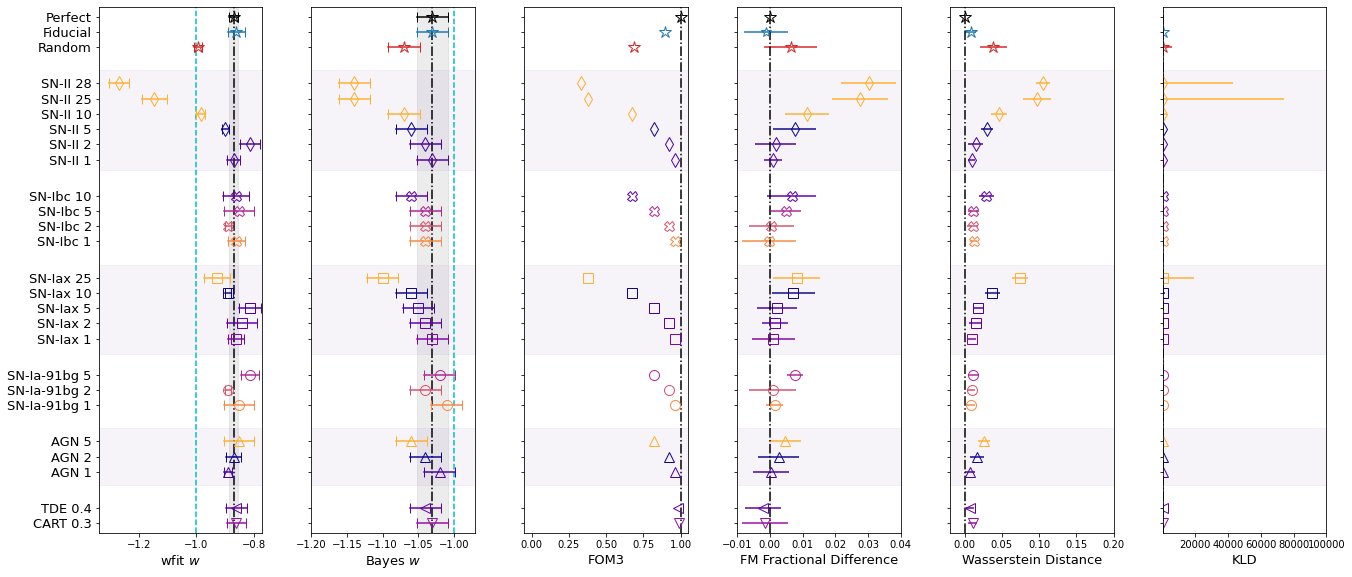

In [71]:
fig, axes = plt.subplots(1, 6, figsize=(22,10), sharey=True)

# wfit
ax1 = axes[0]

# Bayes
ax2 = axes[1]

ax1.axvline(-1, color='c', ls='--')
ax2.axvline(-1, color='c', ls='--')

wfit_perf_mean = np.mean(summary_dict['wfit']['perfect3000'])
wfit_perf_std = np.sqrt(sum([(item * item) for item in summary_dict['wfit_std']['perfect3000']])/5)

ax1.axvline(wfit_perf_mean, color='k', ls='-.')
ax1.axvspan(wfit_perf_mean - wfit_perf_std, 
            wfit_perf_mean +  wfit_perf_std, 
            alpha=0.15, color='grey')

stan_perf_mean =  np.mean(summary_dict['stan']['perfect3000'])
stan_perf_std = np.sqrt(sum([(item * item) for item in summary_dict['stan_std']['perfect3000']])/5)
ax2.axvline(stan_perf_mean, color='k', ls='-.')
ax2.axvspan(stan_perf_mean - stan_perf_std, 
            stan_perf_mean + stan_perf_std, 
            alpha=0.15, color='grey')

# FOM3
ax3 = axes[2]
fom_perf_mean =  np.mean(summary_dict['fom3']['perfect3000'])
fom_perf_std = np.std(summary_dict['fom3']['perfect3000'])
ax3.axvline(fom_perf_mean, color='k', ls='-.')
ax3.axvspan(fom_perf_mean - fom_perf_std, 
            fom_perf_mean +  fom_perf_std, 
            alpha=0.15, color='grey')

# Fisher
# percent different
ax4 = axes[3]
fisher_perf_mean =  np.mean(summary_dict['FM']['perfect3000'])
fisher_perf_std = np.std(summary_dict['FM']['perfect3000'])
ax4.axvline(fisher_perf_mean, color='k', ls='-.')
ax4.axvspan(fisher_perf_mean - fisher_perf_std, 
            fisher_perf_mean +  fisher_perf_std, 
            alpha=0.15, color='grey')


# Wasserstein
ax5 = axes[4]
ax5.axvline(0, color='k', ls='-.')


# KLD
ax6 = axes[5]
ax6.axvline(0, color='k', ls='-.')


i = 0
tick_lbls = []
i_list = []
for j, (a, c) in enumerate(zip(remap_dict, color_nums)):
    try:
        # wfit
        wfw = np.array([np.mean(summary_dict['wfit'][a])])
        wfw_sig = np.array([np.sqrt(sum([(item * item) for item in summary_dict['wfit_std'][a]])/5)])

        #wfw = df['wfit_w_lowz'].loc[df['case'] == a].values
        #wfw_sig = df['wfit_wsig_lowz'].loc[df['case'] == a].values
        class_ = str.split(remap_dict[a])[0]
        
        # Fisher
        fm = np.array(np.nanmean(summary_dict['FM'][a]))
        fm_st = np.array(np.nanstd(summary_dict['FM'][a], ddof=1))
        
        # Wasserstein
        wsd = np.array([np.mean(summary_dict['Wasserstein'][a])])
        wsd_st = np.array([np.std(summary_dict['Wasserstein'][a], ddof=1)])
        
        # fom3
        #fom3 = df['fom3'].loc[df['case'] == a].values
        fom3 =  np.array([np.mean(summary_dict['fom3'][a])])
        fom3_st = np.array([np.std(summary_dict['fom3'][a], ddof=1)])
        
        # KLD
        #kld = df['KLD'].loc[df['case'] == a].values
        kld = np.array(np.mean(summary_dict['KLD'][a]))
        kld_st = np.array(np.std(summary_dict['KLD'][a], ddof=1))

        if '91bg' in class_:
            class_ = 'SNIa-91bg'
        else:
            class_ = class_.replace('-', '')

        bad_data=False
        if wfw[0] < -2.2:
            wfw[0] = -1.4
            bad_data=True
            xuplims=[-1.5]
        
        if 'ddf' in file_extension:
            if 'fiducial' in a:
                mfc = 'tab:blue'
            elif 'random' in a:
                mfc = 'tab:red'
            elif 'perfect' in a:
                mfc = 'k'
            else:
                mfc = color_map[c]
        if 'wfd' in file_extension:
            mfc = "none"

        if 'fiducial' in a:
            if bad_data:
                ax1.errorbar(wfw, [-i], xerr=[0.03], marker='*',color='tab:blue',
                             xuplims=xuplims, markersize=12, mfc=mfc)
            else:
                ax1.plot(wfw, -i, '*', color='tab:blue', ms=12, mfc=mfc)
                ax1.plot([wfw - wfw_sig, wfw + wfw_sig], [-i, -i], "|-", color='tab:blue', ms=10)
        elif 'random' in a:
            if bad_data:
                ax1.errorbar(wfw, [-i], xerr=[0.03], marker='*',color='tab:red',
                             xuplims=xuplims, markersize=12, mfc=mfc)
            else:
                ax1.plot(wfw, -i, '*', color='tab:red', ms=12, mfc=mfc)
                ax1.plot([wfw - wfw_sig, wfw + wfw_sig], [-i, -i], "|-", color='tab:red', ms=10)
        elif 'perfect' in a:
            ax1.plot(wfw, -i, '*', color='k', ms=12, mfc=mfc)
            ax1.plot([wfw - wfw_sig, wfw + wfw_sig], [-i, -i], "|-", color='k', ms=10 )
        elif 'all_objs_survived' in a:
            ax1.plot(wfw, -i, '*', color='seagreen', ms=12, mfc=mfc)
            ax1.plot([wfw - wfw_sig, wfw + wfw_sig], [-i, -i], "|-", color='seagreen', ms=10 )
        else:
            if bad_data:
                ax1.errorbar(wfw, [-i], xerr=[0.03], marker=all_shapes[class_],color=color_map[c],
                             xuplims=xuplims, markersize=10)
            else:
                ax1.plot(wfw, -i, color=color_map[c], ms=10, marker=all_shapes[class_], mfc=mfc)
                ax1.plot([wfw - wfw_sig, wfw + wfw_sig], [-i, -i], "|-", color=color_map[c], ms=10)

        # Stan/Bayes
        bw = np.array([np.mean(summary_dict['stan'][a])])
        bw_sig = np.array([np.sqrt(sum([(item * item) for item in summary_dict['stan_std'][a]])/5)])
        #bw_sig = df['stan_wsig_lowz'].loc[df['case'] == a].values
        
        bad_data=False
        if bw[0] < -2.2:
            bw[0] = -1.4
            bad_data=True
            xuplims=[-1.5]

        if 'fiducial' in a:
            if bad_data:
                ax2.errorbar(bw, [-i], xerr=[0.03], marker='*',color='tab:blue',
                             xuplims=xuplims, markersize=12, mfc=mfc)
            else:
                ax2.plot(bw, -i, '*', color='tab:blue', ms=12, mfc=mfc)
                ax2.plot([bw - bw_sig, bw + bw_sig], [-i, -i], "|-", color='tab:blue', ms=10)
                ax3.plot(fom3, -i, '*', color='tab:blue', ms=12, mfc=mfc)
                ax4.errorbar(fm, np.array([-i]), xerr=fm_st, marker='*', color='tab:blue', ms=10, mfc=mfc)
                ax5.errorbar(wsd, np.array([-i]), xerr=wsd_st, marker='*', color='tab:blue', ms=12, mfc=mfc)
                #ax6.semilogx(kld, -i, '*', color='tab:blue', ms=12, mfc=mfc)
                ax6.errorbar(np.log(kld), np.array([-i]),  xerr=kld_st, marker='*', color='tab:blue', ms=12, mfc=mfc)
        elif 'random' in a:
            if bad_data:
                ax2.errorbar(bw, [-i], xerr=[0.03], marker='*',color='tab:red',
                             xuplims=xuplims, markersize=12, mfc=mfc)
            else:
                ax2.plot(bw, -i, '*', color='tab:red', ms=12, mfc=mfc)
                ax2.plot([bw - bw_sig, bw + bw_sig], [-i, -i], "|-", color='tab:red', ms=10)
                ax3.plot(fom3, -i, '*', color='tab:red', ms=12, mfc=mfc)
                ax4.errorbar(fm, np.array([-i]), marker='*', xerr=fm_st, color='tab:red', ms=12, mfc=mfc)
                ax5.errorbar(wsd, np.array([-i]), marker='*', xerr=wsd_st, color='tab:red', ms=12, mfc=mfc)
                if np.isnan(kld):
                    ax6.errorbar(1e10, [-i], xerr=[1e10], marker='*',color='tab:red',
                                 xlolims=True, 
                                 markersize=12, mfc=mfc)
                else:
                    #ax6.semilogx(kld, -i, '*', color='tab:red', ms=12, mfc=mfc)
                    ax6.errorbar(np.log(kld), np.array([-i]), xerr=kld_st, marker='*', color='tab:red', ms=12, mfc=mfc)
        elif 'perfect' in a:
            ax2.plot(bw, -i, '*', color='k', ms=12, mfc=mfc)
            ax2.plot([bw - bw_sig, bw + bw_sig], [-i, -i], "|-", color='k', ms=10 )
            ax3.plot(fom3, -i, '*', color='k', ms=12, mfc=mfc)
            ax4.plot(0, -i, '*', color='k', ms=12, mfc=mfc)
            ax5.plot(0, -i, '*', color='k', ms=12, mfc=mfc)
        else:
            ax2.plot(bw, -i, color=color_map[c], ms=10, marker=all_shapes[class_], mfc=mfc)
            ax2.plot([bw - bw_sig, bw + bw_sig], [-i, -i], "|-", color=color_map[c], ms=10)
            ax3.plot(fom3, -i, color=color_map[c], ms=10, marker=all_shapes[class_], mfc=mfc)
            ax4.errorbar(fm, np.array([-i]), xerr=fm_st, color=color_map[c], ms=10, marker=all_shapes[class_], mfc=mfc)
            ax5.errorbar(wsd, np.array([-i]), xerr=wsd_st, color=color_map[c], ms=10, marker=all_shapes[class_], mfc=mfc)
            if np.isnan(kld):
                ax6.errorbar(1e10, [-i], xerr=[1e10],  marker=all_shapes[class_], color=color_map[c],
                                 xlolims=True, 
                                 markersize=10, mfc=mfc)
            else:
                #ax6.semilogx(kld, -i, color=color_map[c], ms=10, marker=all_shapes[class_], mfc=mfc)
                ax6.errorbar(np.log(kld), np.array([-i]), xerr=kld_st,color=color_map[c], ms=10, marker=all_shapes[class_], mfc=mfc)
            
        tick_lbls.append(remap_dict[a])
        i_list.append(-i)
        i +=0.8
        if 'random' in a or '99SNIa1' in a:
            i_list.append(-i)
            i += 1.1
            tick_lbls.append('')
    except:
        continue
        #print("Missing: ", a)

tick_locs = i_list[::-1]
ax1.set_yticks(tick_locs)
ax1.set_yticklabels(tick_lbls[::-1], fontsize=13)

ax1.set_ylim(i_list[-1]-0.5, i_list[0]+0.5)#-len(tick_lbls)+0.5, 0.5)


ax1.set_xlabel(r'wfit $w$', fontsize=13)
ax2.set_xlabel(r'Bayes $w$', fontsize=13)
ax3.set_xlabel('FOM3', fontsize=13)
ax4.set_xlabel('FM Fractional Difference', fontsize=13)
ax5.set_xlabel('Wasserstein Distance', fontsize=13)
ax6.set_xlabel('KLD', fontsize=13)
plt.subplots_adjust(bottom=0.15, wspace=0.3) # wspace=0.05

        
if 'ddf' in file_extension:
    ax1.set_xlim(-1.44, -0.97)
    ax2.set_xlim(-1.44, -0.97)
    ax3.set_xlim(0, 1.05)
    ax4.set_xlim(-0.025, 0.05)
    ax5.set_xlim(-0.02, 0.22)
    ax6.set_xlim(1e5, 3e10)
if 'wfd' in file_extension:
    ax1.set_xlim(-1.34, -0.77)
    ax2.set_xlim(-1.2, -0.97)
    ax3.set_xlim(-0.05, 1.05)
    ax4.set_xlim(-0.01, 0.04)
    ax5.set_xlim(-0.02, 0.2)
    ax6.set_xlim(0.001, 1e5)

if 'ddf' in file_extension:
    #ticks = [-4, -13, -19, -24, -27, -30]
    ticks = [-4, -11, -15, -21]
   
    for ax in axes:
        for t in ticks:
            yticks = ax.yaxis.get_major_ticks()
            yticks[t].set_visible(False)
        ax.axvspan(-2.3, 5e10, ymin=0.59, ymax=0.83, alpha=0.08, color='tab:purple')
        ax.axvspan(-2.3, 5e10, ymin=0.17, ymax=0.37, alpha=0.08, color='tab:purple')
    
if 'wfd' in file_extension:
    ticks = [-4, -11, -16, -22, -26, -30]
    
    for ax in axes:
        for t in ticks:
            yticks = ax.yaxis.get_major_ticks()
            yticks[t].set_visible(False)
        ax.axvspan(-1.5, 2e10, ymin=0.69, ymax=0.88, alpha=0.08, color='tab:purple')
        ax.axvspan(-1.5, 2e10, ymin=0.34, ymax=0.51, alpha=0.08, color='tab:purple')
        ax.axvspan(-1.5, 2e10, ymin=0.09, ymax=0.2, alpha=0.08, color='tab:purple')
    
#plt.savefig('all_metrics_' + file_extension + '_lowz_20210630_emillesamp_5samp.pdf', bbox_inches='tight')
plt.show()


If you're not seeing anything in KLD, try to expand the x range. It has not been re-tuned with the updated values.

In [57]:
df

,case,other_name,other_code,nIa,nothers,perc_Ia,perc_others,accuracy,efficiency,purity,...,wfit_wsig_lowz,wfit_om_lowz,wfit_omsig_lowz,stan_w_lowz,stan_wsig_lowz,stan_om_lowz,stan_omsig_lowz,WassersteinDistanceMedian,other_short,KLD
0,90SNIa10SNIax,Iax,43,2700,300,90.0,10.0,0.818512,0.900,0.900,...,0.0098,0.3095,0.0047,-1.06,0.02,0.31,0.0039,0.027787,Iax,1088.324359
1,99SNIa1SNIbc,"['Ibc', 'Ibc']","[3, 13]",2970,"[22, 8]",99.0,"[1.0, 0.0]",0.981851,0.990,0.990,...,0.0274,0.3090,0.0049,-1.04,0.02,0.30,0.0045,0.008919,Ibc,102.238084
2,75SNIa25SNII,"['II', 'II', 'II']","[2, 12, 14]",2250,"[383, 319, 48]",75.0,"[13.0, 11.0, 2.0]",0.546279,0.750,0.750,...,0.0389,0.3110,0.0017,-1.14,0.02,0.31,0.0017,0.114682,II,128860.948056
3,95SNIa5SNIax,Iax,43,2850,150,95.0,5.0,0.909256,0.950,0.950,...,0.0356,0.3002,0.0055,-1.05,0.02,0.31,0.0042,0.017095,Iax,360.902813
4,99SNIa1SLSN,SLSN,60,2970,30,99.0,1.0,0.981851,0.990,0.990,...,0.0074,0.3050,0.0051,-1.07,0.02,0.31,0.0035,0.037187,SLSN,2204.398523
5,99.7SNIa0.3CART,CART,63,2991,9,100.0,0.3,0.994555,0.997,0.997,...,0.0305,0.3080,0.0051,-1.03,0.02,0.30,0.0050,0.001326,CART,1.073858
6,fiducial3000,"['II', 'Ibc', 'II', 'Iax']","[2, 3, 14, 43]",2928,"[38, 1, 7, 26]",98.0,"[1.0, 0.0, 0.0, 1.0]",0.956443,0.976,0.976,...,0.0273,0.3077,0.0050,-1.03,0.02,0.30,0.0049,0.001441,mix,2.754223
7,99.6SNIa0.4TDE,TDE,64,2988,12,100.0,0.4,0.992740,0.996,0.996,...,0.0338,0.3090,0.0051,-1.04,0.02,0.30,0.0046,0.013691,TDE,241.278883
8,95SNIa5SNIbc,"['Ibc', 'Ibc']","[3, 13]",2850,"[79, 71]",95.0,"[3.0, 2.0]",0.909256,0.950,0.950,...,0.0470,0.3090,0.0056,-1.04,0.02,0.30,0.0044,0.007931,Ibc,79.750266
9,99SNIa1AGN,AGN,70,2970,30,99.0,1.0,0.981851,0.990,0.990,...,0.0131,0.3022,0.0052,-1.02,0.02,0.30,0.0052,0.006769,AGN,61.334211
